# Testing hypotheses to increase revenue in an online store

## Data overview

In [55]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from pandas.plotting import register_matplotlib_converters

In [56]:
# setting the maximum width of columns
pd.options.display.max_colwidth = 200

In [57]:
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [58]:
# reading csv files and assigning the results to variables
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

**Hypothesis**

In [77]:
# printing the head of the DataFrame
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Add two new channels to attract traffic, resulting in 30% more users",3,10,8,6
1,Reduce the delivery time of orders by launching your own delivery service,2,5,4,10
2,Enhance the online store website with product recommendation blocks to increase conversions and average order values,8,3,7,3
3,Changing the category structure will increase conversion as users will be able to find the right products more quickly,8,3,3,8
4,Increase user engagement by changing the homepage background color,3,1,1,1
5,Customers will be more likely to purchase from the store if it has a customer reviews page,3,2,2,3
6,Display banners with current promotions and sales on the main page to increase conversions,5,3,8,3
7,Build an email list by adding a subscription form to all main pages,10,7,8,5
8,Offer a birthday discount on goods,1,9,9,5


- Change the column names to lowercase.

In [78]:
# printing information about the DataFrame
hypothesis.info()

# computing a summary of statistics
hypothesis.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 440.0+ bytes


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [79]:
# checking for duplicates
hypothesis.duplicated().sum()

0

**Orders**

In [80]:
# printing the head of the DataFrame
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


- Change column names to snake case.

In [81]:
# printing information about the DataFrame
orders.info()

# computing a summary of statistics
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


- Convert the date column type to datetime.

In [82]:
# checking for duplicates
orders.duplicated().sum()

0

**Visitors**

In [83]:
# printing the head of the DataFrame
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [84]:
# printing information about the DataFrame
visitors.info()

# computing a summary of statistics
visitors.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


- Convert the date column type to datetime.

In [85]:
# checking for duplicates
visitors.duplicated().sum()

0

**Conclusion**

Hypothesis:
- Change the column names to lowercase.

Orders:
- Change column names to snake case;
- Convert the date column type to datetime.

Visitors:
- Convert the date column type to datetime. 

## Data preprocessing

In [86]:
# renaming the columns
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [87]:
# converting the 'date' column type to datetime.
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

In [88]:
# checking for groups in the orders table
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [89]:
# checking for groups in the visitors table
visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

In [90]:
# identifying the minimum and maximum date in table orders
min_date_orders = orders['date'].min()
max_date_orders = orders['date'].max()

display('First date of A/B test:', min_date_orders)
display('Last date of A/B test:', max_date_orders)

'First date of A/B test:'

Timestamp('2019-08-01 00:00:00')

'Last date of A/B test:'

Timestamp('2019-08-31 00:00:00')

In [91]:
# identifying the minimum and maximum date in table visitors
min_date_visitors = visitors['date'].min()
max_date_visitors = visitors['date'].max()

display('First date of A/B test:', min_date_visitors)
display('Last date of A/B test:', max_date_visitors)

'First date of A/B test:'

Timestamp('2019-08-01 00:00:00')

'Last date of A/B test:'

Timestamp('2019-08-31 00:00:00')

- First and last dates of A/B test are the same in tables orders and visitors.

**Conclusion**

- Changed the column names of the hypothesis and orders tables;
- Converted the 'date' columns type to datetime in the orders and visitors tables;
- There are groups A and B in A/B test;
- First date of A/B test: 2019-08-01
- Last date of A/B test: 2019-08-31

## Prioritization of hypotheses

- Apply the ICE framework to prioritize hypotheses;
- Apply the RICE framework to prioritize hypotheses;
- Explain how the priority of hypotheses changed when RICE was used instead of ICE. 

### Applying the ICE framework to prioritize hypotheses

In [92]:
# calculating ICE using the (impact * confidence / efforts) formula and saving it in the hypothesis table
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [93]:
# sorting in the descending order and displaying
hypothesis_ice = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False).round(2)
hypothesis_ice

,hypothesis,ICE
8,Offer a birthday discount on goods,16.20
0,"Add two new channels to attract traffic, resulting in 30% more users",13.33
7,Build an email list by adding a subscription form to all main pages,11.20
6,Display banners with current promotions and sales on the main page to increase conversions,8.00
2,Enhance the online store website with product recommendation blocks to increase conversions and average order values,7.00
1,Reduce the delivery time of orders by launching your own delivery service,2.00
5,Customers will be more likely to purchase from the store if it has a customer reviews page,1.33
3,Changing the category structure will increase conversion as users will be able to find the right products more quickly,1.12
4,Increase user engagement by changing the homepage background color,1.00


Hypotheses number 8 has the highest priority in the ICE framework.

### Applying the RICE framework to prioritize hypotheses

In [94]:
# calculating RICE using the (reach * impact * confidence / efforts) formula and saving it in the hypothesis table
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [95]:
# sorting in descending order and displaying
hypothesis_rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)
hypothesis_rice

,hypothesis,RICE
7,Build an email list by adding a subscription form to all main pages,112.0
2,Enhance the online store website with product recommendation blocks to increase conversions and average order values,56.0
0,"Add two new channels to attract traffic, resulting in 30% more users",40.0
6,Display banners with current promotions and sales on the main page to increase conversions,40.0
8,Offer a birthday discount on goods,16.2
3,Changing the category structure will increase conversion as users will be able to find the right products more quickly,9.0
1,Reduce the delivery time of orders by launching your own delivery service,4.0
5,Customers will be more likely to purchase from the store if it has a customer reviews page,4.0
4,Increase user engagement by changing the homepage background color,3.0


Hypotheses number 7 has the highest priority in the RICE framework.

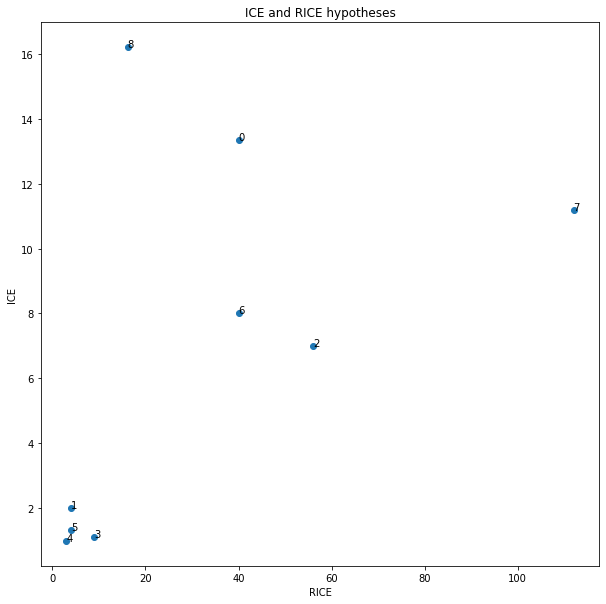

In [96]:
# visualizing ICE and RICE hypotheses
y = hypothesis['ICE'] 
z = hypothesis['RICE'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE hypotheses") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()    

### Explaining how the priority of hypotheses changed when RICE was used instead of ICE. 

In [97]:
# merging ICE and RICE on the hypothesis column
hypothesis_priority = hypothesis_ice.merge(hypothesis_rice, on = 'hypothesis')
hypothesis_priority

,hypothesis,ICE,RICE
0,Offer a birthday discount on goods,16.20,16.2
1,"Add two new channels to attract traffic, resulting in 30% more users",13.33,40.0
2,Build an email list by adding a subscription form to all main pages,11.20,112.0
3,Display banners with current promotions and sales on the main page to increase conversions,8.00,40.0
4,Enhance the online store website with product recommendation blocks to increase conversions and average order values,7.00,56.0
5,Reduce the delivery time of orders by launching your own delivery service,2.00,4.0
6,Customers will be more likely to purchase from the store if it has a customer reviews page,1.33,4.0
7,Changing the category structure will increase conversion as users will be able to find the right products more quickly,1.12,9.0
8,Increase user engagement by changing the homepage background color,1.00,3.0


The parameter (Reach) used in the RICE framework changed the entire priority obtained by the ICE framework, only 6 and 4 hypotheses remained in the same places.

**Conclusion**

- Applied the ICE framework to prioritize hypotheses. Hypotheses number 8 has the highest priority in the ICE framework.
- Applied the RICE framework to prioritize hypotheses. Hypotheses number 7 has the highest priority in the ICE framework.
- The parameter (Reach) used in the RICE framework changed the entire priority obtained by the ICE framework, only 6 and 4 hypotheses remained in the same places.

## A/B test analysis

- Plot on a graph the cumulative revenue by groups;
- Plot on a graph the cumulative average check by group;
- Plot on a graph the relative change in the cumulative average check of group B to group A;
- Plot on a graph the cumulative conversion by group;
- Plot on a graph the relative change in the cumulative conversion of group B to group A;
- Plot a scatter plot of the number of orders by users;
- Calculate the 95th and 99th percentiles of orders per user. Set a boundary for identifying anomalous users;
- Plot a scatter plot of order revenue;
- Calculate the 95th and 99th percentiles of order revenue. Set a boundary for identifying anomalous orders;
- Calculate the statistical significance of differences in conversions between groups using "raw" data (without removing anomalous users);
- Calculate the statistical significance of the differences in the average order check between the groups using "raw" data (without removing anomalous users);
- Calculate the statistical significance of differences in conversion between the groups using "clean" data (with removing anomalous users);
- Calculate the statistical significance of the differences in the average order check between the groups using "clean" data (without removing anomalous users);
- Making a decision based on the results of the test.

### Plotting on a graph the cumulative revenue by groups

In [98]:
# creating an array of unique pairs of date and group values
datesGroups = orders[['date','group']].drop_duplicates() 

Let's aggregate daily order data:

- Get the rows of the orders table where the date is less than or equal to the date from datesGroups, and the group is equal to the group from datesGroups: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].

- Aggregate values. Calculate the maximum date, the maximum group, the number of unique IDs of orders and users, and the sum of average checks: .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}). 

- Apply to each row of the dataframe: apply(axis=1) 
- Sort values by the 'date' and 'group' columns

In [99]:
# aggregating cumulative data on orders by day
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({
        'date' : 'max', 
        'group' : 'max', 
        'transaction_id' : 'nunique', 
        'visitor_id' : 'nunique', 
        'revenue' : 'sum'}), axis=1).sort_values(
    by=['date','group']) 

Similarly aggregate cumulative data on visitors by day.

In [100]:
# aggregating cumulative data on visitors by day 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(
    by=['date','group'])

In [101]:
# merging both tables
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Let's check whether the cummulativeData dataframe was created correctly.

In [102]:
# checking whether the minimum and maximum dates in the cumulativeData dataframe 
# match the minimum and maximum dates in the original dataframes
min_date_cumulativeData = cumulativeData['date'].min()
max_date_cumulativeData = cumulativeData['date'].max()

display('First date of A/B test:', min_date_cumulativeData)
display('Last date of A/B test:', max_date_cumulativeData)

'First date of A/B test:'

Timestamp('2019-08-01 00:00:00')

'Last date of A/B test:'

Timestamp('2019-08-31 00:00:00')

The minimum and maximum dates match dates in the original dataframes.

Next, plot graphs of cumulative revenue by days and groups of A/B testing.

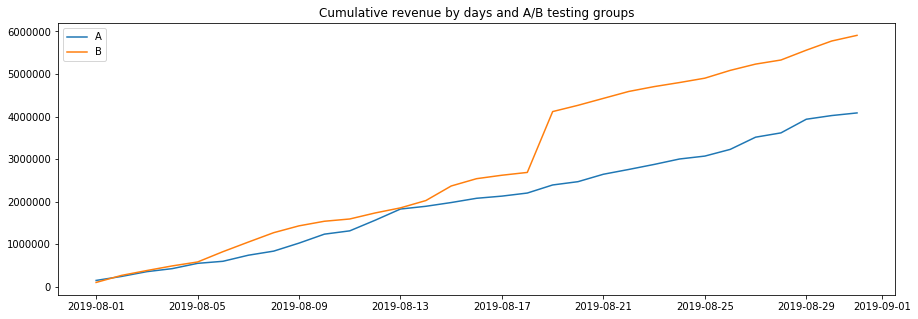

In [103]:
# creating a dataframe with group A cumulative revenue
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# creating a dataframe with group B cumulative revenue
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# plotting a graph with group A cumulative revenue
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# plotting a graph with group B cumulative revenue
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Cumulative revenue by days and A/B testing groups')
plt.legend() 

- Early in August, revenue in group B is growing slightly faster than in group A.
- On August 13 revenue is about the same.
- Group B's revenue shows a sharp increase on August 19. This may indicate a spike in order volume, or expensive orders.

Let's take a look at what orders were placed between August 17 and August 21.

In [104]:
# checking group B orders between August 17 and 21
cumulativeRevenueB.query('"2019-08-17" <= date <= "2019-08-21"')

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


The order volume on August 19 is similar to that on August 17 and 21.

In [105]:
# checking median revenue on August 19
print('Median revenue on August 19 =',orders.query('date == "2019-08-19"')['revenue'].median())
orders.query('date == "2019-08-19"').sort_values(by='revenue', ascending=False).head(10)

Median revenue on August 19 = 2630.0


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A
463,4170537404,290022471,2019-08-19,16480,B
531,4016435970,4017075195,2019-08-19,13390,A


A single order #425 of 1.3 million was placed on August 19 in group B. The remaining orders did not exceed 44,000. This is an outlier that should be considered in further analysis.

### Plotting on a graph the cumulative average check by group

Divide the cumulative revenue by the cumulative order volume to plot on a graph the cumulative average check by group, 

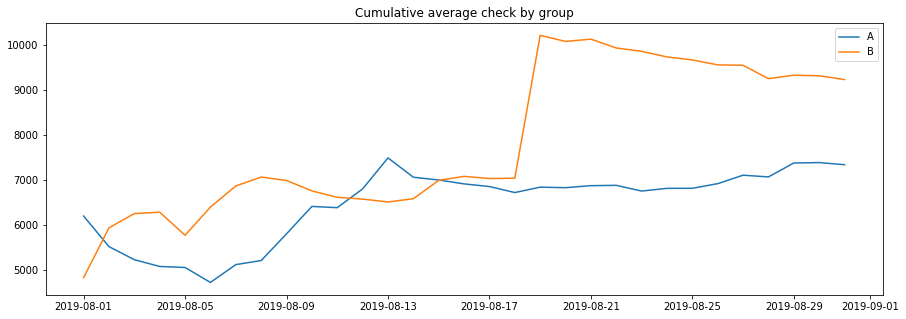

In [106]:
# plotting on a graph the cumulative average check by group
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative average check by group')
plt.legend() 

- The average check of group B is higher in the first half of August. However, there are two dates where the check is larger in A - August 1 and August 13. 
- The graph also shows a strong impact on the average check of order No. 425 on August 19.
- B gradually decreased its average check after August 19, while A gradually increased it after August 18.

### Plotting on a graph the relative change in the cumulative average check of group B to group A

Add a horizontal line across the axis using the axhline() method to plot on a graph the relative change in the cumulative average check of group B to group A.

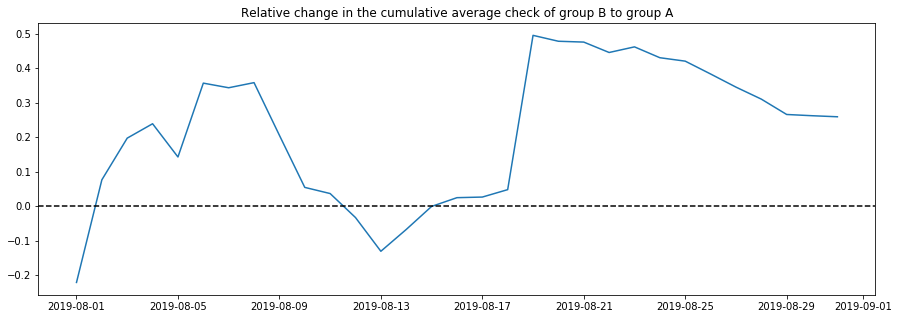

In [107]:
# merging cumulativeRevenueA and cumulativeRevenueB
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting ratio of cumulative average invoice
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Relative change in the cumulative average check of group B to group A')

# add x axis
plt.axhline(y=0, color='black', linestyle='--') 

- In this graph, the conclusions are mostly the same as in the previous step.
- On August 2, group B's average check had already exceeded that of group A, and it continued to grow through August 7. From August 7 to August 13, the average check decreased, and from August 12 the average check A was greater than B on three days. A turning point came on August 15 when check B grew again and became larger than A until the end of the month. 
- A strong growth was seen on August 19 due to order No. 425, and the average check B gradually decreased over the following days. 

### Plotting on a graph the cumulative conversion by group

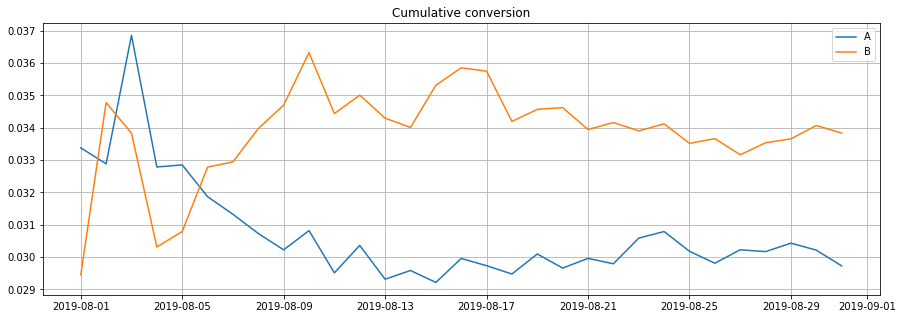

In [108]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# creating a dataframe with group A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# creating a dataframe with group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting on a graph
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Cumulative conversion')
plt.grid()
plt.legend()

- The conversion rate A was significantly higher from August 1st to 5th. By August 3, it had peaked for the whole observation period, but after that, it started falling sharply and by August 9, it had stabilized at 0.029-0.031.
- The conversion B began growing on August 4 and already exceeded the conversion of A on August 6 (the maximum value exceeded 0.036). Following that, conversion growth declined gradually. On August 15-17, it surged to just below 0.036. 
- Since August 6, the conversion of group B has consistently been higher than A.

### Plotting on a graph the relative change in the cumulative conversion of group B to group A

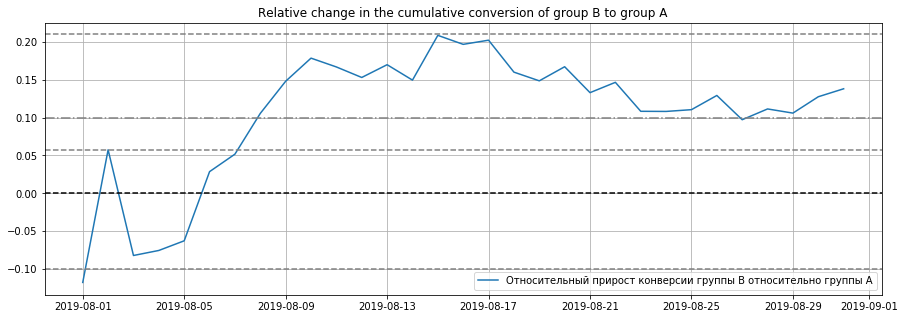

In [109]:
# plotting the relative change in the cumulative conversion of group B to group A

# merging conversion A with conversion B 
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting on a graph
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid()
plt.title('Relative change in the cumulative conversion of group B to group A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='-.')
plt.axhline(y=0.057, color='grey', linestyle='--');


- In this graph, the conclusions are mostly the same as in the previous step.
- During the period August 1 to 5, the conversion rate for group A was 5-10% higher. On August 2, however, conversion for group B were 5% higher than for group A. 
- There was a strong increase in conversions on August 2. It may have been a promotion or discount.
- After August 6, Group B had the lead. Its conversion increased until August 15 and the maximum difference from A was 21%, then it gradually decreased to 10% -14%.

### Plotting a scatter plot of the number of orders by users

In [110]:
# counting the number of orders by users
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id','orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


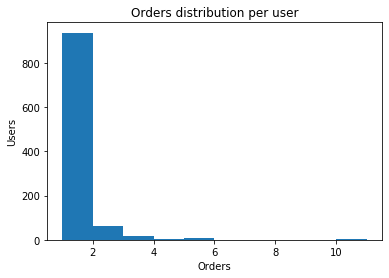

In [111]:
# plotting a histogram of orders distribution per user
plt.hist(ordersByUsers['orders']) 
plt.title('Orders distribution per user')
plt.ylabel('Users')
plt.xlabel('Orders')
plt.show()

The majority of users ordered only once. However, there are users with 2-4 orders. 

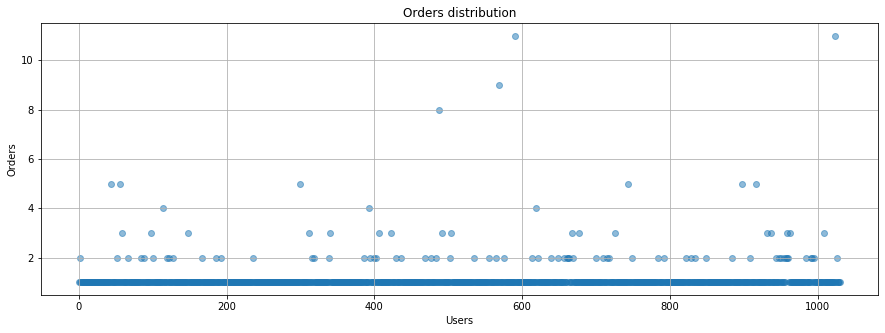

In [112]:
# plotting a scatter plot of orders distribution per user
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('Orders distribution')
plt.ylabel('Orders')
plt.xlabel('Users')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

- The majority of users ordered once.

### Calculating the 95th and 99th percentiles of orders per user. Setting a boundary for identifying anomalous users. 

In [113]:
# calculating the 95th and 99th percentiles of orders per user
print('95th and 99th percentiles of orders per user: ', np.percentile(ordersByUsers['orders'], [95, 99])) 

95th and 99th percentiles of orders per user:  [2. 4.]


- No more than 5% of users placed more than two orders.
- No more than 1% of users placed more than four orders.
- The lower limit of 2 orders per user is reasonable for weeding out anomalous users. 

### Plotting a scatter plot of order revenue

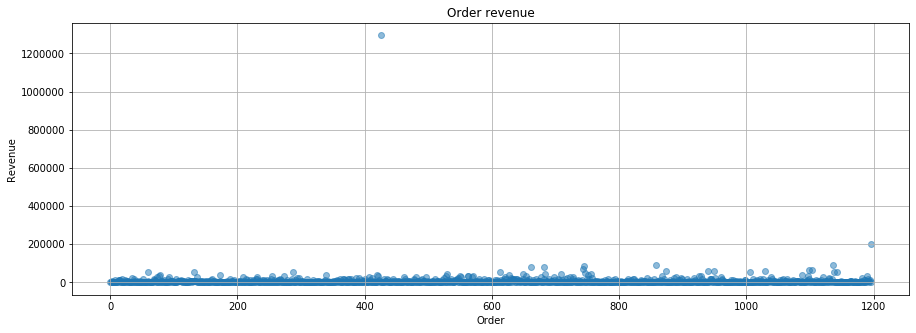

In [114]:
# plotting a scatter plot of order revenue
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Order revenue')
plt.ylabel('Revenue')
plt.xlabel('Order')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

Let's remove orders with 'revenue' larger than 199000.

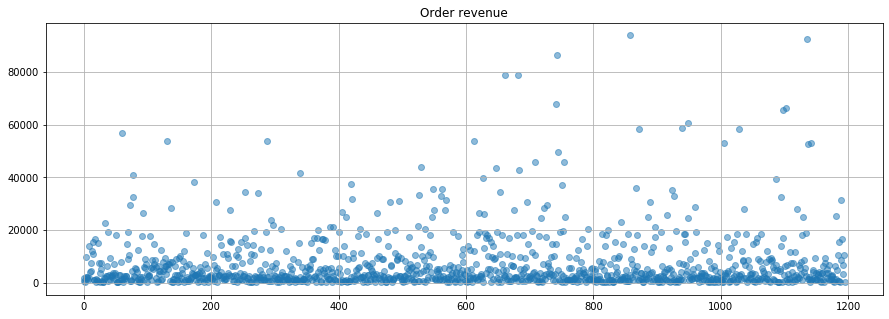

In [115]:
# plotting a scatter plot of order revenue with 'revenue' less than 199000
orders2 = orders[orders['revenue']<=195000]['revenue']
x_values2 = pd.Series(range(0,len(orders2)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Order revenue')
plt.scatter(x_values2, orders2, alpha=0.5);

- Anomaly order No. 425 is shown on the first chart for 1.3 million and another one for 200 thousand. There are no more than 100 thousand orders remaining. 

### Calculating the 95th and 99th percentiles of order revenue. Setting a boundary for identifying anomalous orders.

In [116]:
# calculating the 95th and 99th percentiles of the order revenue
print('95th and 99th percentiles of order revenue: ', np.percentile(orders['revenue'], [95, 99])) 

95th and 99th percentiles of order revenue:  [28000.  58233.2]


- No more than 5% of orders have  28000 in revenue.
- No more than 1% of orders have  58233.2 in revenue.
- The limit of 58233.2 is reasonable for weeding out anomalous orders.

### Calculating the statistical significance of differences in conversions between groups using "raw" data (without removing anomalous users)

Let's formulate the null and alternative hypotheses:
- H0: there are no statistically significant differences in conversion between groups A and B; 
- H1: there are statistically significant differences in conversion between groups A and B.

In [117]:
# creating tables with daily visitors by group
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


In [118]:
# merging into one table
data = visitorsADaily.merge(visitorsBDaily, left_on='date', right_on='date', how='left')
data.head()

,date,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [119]:
# creating variables ordersByUsersA and ordersByUsersB with columns ['visitor_id', 'orders']
# where for users who ordered at least once indicate the number of completed orders

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

For the Mann-Whitney test, create the variables sampleA and sampleB where the number of orders corresponds to different groups. Users who didn't order anything will be matched with zeros.

The variables must have two parts:

1. A list with the number of orders for each user: ordersByUsersA['orders']
2. Zeros for users who didn't order anything: the difference between the sum of visitors and the number of order records: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
    - Create a pd.Series object of the required length: pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

In [120]:
# creating variables sampleA and sampleB
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In sampleA each element is the number of orders of a user, including zero. This means that the number of elements of sampleA is the number of users, the sum of all elements is the number of orders.

To get the conversion, divide the sum of orders by the number of users — find the average in the sampleA using the mean() method. Same for group B: sampleB.mean().

Derive the relative growth of group B conversion: group B conversion / group A conversion - 1. 

In [121]:
# calculating p-value and relative growth of B to A
alpha = .05

results = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-value: {0:.3f}'.format(results))

if (results < alpha):
    print('We reject the null hypothesis')
    print("relative change of 'B' over 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
else:
    print('We do not reject the null hypothesis')
    print("relative change of 'B' over 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.008
We reject the null hypothesis
relative change of 'B' over 'A' = 0.138


- P-value is less than 0.05. This means that we reject the null hypothesis and there are statistically significant
differences in conversion between groups A and B.
- Group B's relative change over A is 13.8%. The difference of 13.8% is statistically significant.

### Calculate the statistical significance of the differences in the average order check between the groups using "raw" data (without removing anomalous users)

Let's formulate the null and alternative hypotheses:
- H0: there are no statistically significant differences in the average check between groups;
- H1: there are statistically significant differences in the average check between groups.

To calculate the statistical significance of the differences in the average order check, we use data on revenue from orders.

In [122]:
# calculating p-value and relative growth of B to A

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value: {0:.3f}'.format(results))

if (results < alpha):
    print('We reject the null hypothesis')
    print("relative change of 'B' over 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
else:
    print('We do not reject the null hypothesis')
    print("relative change of 'B' over 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.365
We do not reject the null hypothesis
relative change of 'B' over 'A' = 0.259


- P-value is significantly greater than 0.05. This means that we do not reject the null hypothesis  - there are no statistically significant differences in the average check between groups.
- The B's relative change over A is 26%. The difference of 26% is not statistically significant.

### Calculating the statistical significance of differences in conversion between the groups using "clean" data (with removing anomalous users)

Anomalous are users who have made more than two orders or orders more expensive than 58233.2. 5% of the users with the most orders and 1% of users with expensive orders will be deleted. 

In the abnormalUsers table, we will combine users with more than 2 orders - usersWithManyOrders - and orders more expensive than 58233.2 -  usersWithExpensiveOrders. Use shape() to find out how many anomalous users there are. 

Let's formulate the null and alternative hypotheses:
- H0: there are no statistically significant differences in conversion between groups A and B; 
- H1: there are statistically significant differences in conversion between groups A and B.

In [123]:
# creating variables usersWithManyOrders and usersWithExpensiveOrders
# merging two variables in abnormalUsers

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['visitor_id'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['visitor_id']


abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
                 .drop_duplicates()
                 .sort_values())

print(abnormalUsers.head())
print('Total anomalous users =', abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitor_id, dtype: int64
Total anomalous users = 31


In [124]:
# creating variables sampleAFiltered and sampleBFiltered where anomalous users are filtered out
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders',),],axis=0,)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders',),], axis=0,)

In [125]:
# calculating p-value and relative growth of B to A

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-value: {0:.3f}'.format(results))

if (results < alpha):
    print('We reject the null hypothesis')
    print("relative change of 'B' over 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
else:
    print('We do not reject the null hypothesis')
    print("relative change of 'B' over 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.005
We reject the null hypothesis
relative change of 'B' over 'A' = 0.174


- P-value is less than 0.05. This means that we reject the null hypothesis and there are statistically significant differences in conversion between groups A and B.
- The relative change of group B over A is 17.4%. The difference of 17.4% is statistically significant. This is higher than with "raw" data - 13.8%. 

### Calculating the statistical significance of the differences in the average order check between the groups using "clean" data (without removing anomalous users)

Let's formulate the null and alternative hypotheses:
- H0: there are no statistically significant differences in the average check between groups;
- H1: there are statistically significant differences in the average check between groups.

In [126]:
# calculating p-value and relative growth of B to A

results = stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id']
                                                                 .isin(abnormalUsers)),)]['revenue'], 
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id']
                                                                 .isin(abnormalUsers)),)]['revenue'],)[1]

print('p-value: {0:.3f}'.format(results))

if (results < alpha):
    print('We reject the null hypothesis')
    print("relative change of 'B' to 'A' = {0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id']
                                                                     .isin(abnormalUsers)),)]['revenue'].mean() / 
        orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id']
                                                                     .isin(abnormalUsers)),)]['revenue'].mean()- 1))
else:
    print('We do not reject the null hypothesis')
    print("relative change of 'B' to 'A' = {0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id']
                                                                     .isin(abnormalUsers)),)]['revenue'].mean() / 
        orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id']
                                                                     .isin(abnormalUsers)),)]['revenue'].mean()- 1))

p-value: 0.399
We do not reject the null hypothesis
relative change of 'B' to 'A' = -0.020


- P-value is significantly greater than 0.05. This means that we do not reject the null hypothesis that there are no statistically significant differences in the average check between groups. 
- The relative change of group B over A is -2%. Group A has a slightly larger average check than group B because the anomalous order No. 425 for 1.3 million has been filtered out. The difference of -2% is not statistically significant. This is lower than with "raw" data - 26%.

### Making a decision based on the results of the test 

The test results revealed:

- For both "raw" and "clean" data, there were statistically significant differences in the conversion of groups A and B. For "raw" data, the relative change of group "B" was 17.4%, and for "clean" it was 13.8%.

- Both "raw" and "clean" data showed no statistically significant difference in average check for groups A and B. For "raw" data, group B had a relative change of 26%, while for "clean", it had a relative growth of -2%. The anomalous order No. 425 for 1.3 million explains the -2% for "clean".

- The test can therefore be stopped and group B recorded as the winner. Group B was much more effective in terms of conversion than group A,  even though the average check is about the same between the two groups. 

## Final conclusion

**Prioritization of hypotheses:**
- Applied the ICE framework to prioritize hypotheses. Hypotheses number 8 has the highest priority in the ICE framework.
- Applied the RICE framework to prioritize hypotheses. Hypotheses number 7 has the highest priority in the ICE framework.
- The parameter (Reach) used in the RICE framework changed the entire priority obtained by the ICE framework, only 6 and 4 hypotheses remained in the same places.

**A/B test analysis:**

1. Plot on a graph the cumulative revenue by groups:
    - Early in August, revenue in group B is growing slightly faster than in group A.
    - On August 13 revenue is about the same.
    - Group B's revenue shows a sharp increase on August 19 because a single order #425 of 1.3 million was placed. This is an outlier that should be considered in further analysis. The remaining orders did not exceed 44,000. 

2. Plot on a graph the cumulative average check by group:
    - The average check of group B is higher in the first half of August. However, there are two dates where the check is larger in A - August 1 and August 13. 
    - The graph also shows a strong impact on the average check of order No. 425 on August 19.
    - B gradually decreased its average check after August 19, while A gradually increased it after August 18.

3. Plote on a graph the relative change in the cumulative average check of group B to group A:
    - In this graph, the conclusions are mostly the same as in the previous step.
    - On August 2, group B's average check had already exceeded that of group A, and it continued to grow through August 7. From August 7 to August 13, the average check decreased, and from August 12 the average check A was greater than B on three days. A turning point came on August 15 when check B grew again and became larger than A until the end of the month. 
    - A strong growth was seen on August 19 due to order No. 425, and the average check B gradually decreased over the following days. 

4. Plot on a graph the cumulative conversion by group:
    - The conversion rate A was significantly higher from August 1st to 5th. By August 3, it had peaked for the whole observation period, but after that, it started falling sharply and by August 9, it had stabilized at 0.029-0.031.
    - The conversion B began growing on August 4 and already exceeded the conversion of A on August 6 (the maximum value exceeded 0.036). Following that, conversion growth declined gradually. On August 15-17, it surged to just below 0.036. 
    - Since August 6, the conversion of group B has consistently been higher than A.

5. Plot on a graph the relative change in the cumulative conversion of group B to group A:
    - In this graph, the conclusions are mostly the same as in the previous step.
    - During the period August 1 to 5, the conversion rate for group A was 5-10% higher. On August 2, however, conversion for group B were 5% higher than for group A. 
    - There was a strong increase in conversions on August 2. It may have been a promotion or discount.
    - After August 6, Group B had the lead. Its conversion increased until August 15 and the maximum difference from A was 21%, then it gradually decreased to 10% -14%.

6. Plot a scatter plot of the number of orders by users:
    - The majority of users ordered once.

7. Calculate the 95th and 99th percentiles of orders per user. Set a boundary for identifying anomalous users:
    - No more than 5% of users placed more than two orders.
    - No more than 1% of users placed more than four orders.
    - The lower limit of 2 orders per user is reasonable for weeding out anomalous users. 

8. Plot a scatter plot of order revenue:
    - Anomaly order No. 425 is shown on the first chart for 1.3 million and another one for 200 thousand. There are no more than 100 thousand orders remaining. 

9. Calculate the 95th and 99th percentiles of order revenue. Set a boundary for identifying anomalous orders:
    - No more than 5% of orders have  28000 in revenue.
    - No more than 1% of orders have  58233.2 in revenue.
    - The limit of 58233.2 is reasonable for weeding out anomalous orders.

10. Calculate the statistical significance of differences in conversions between groups using "raw" data (without removing anomalous users):
    - P-value is less than 0.05. This means that we reject the null hypothesis and there are statistically significant differences in conversion between groups A and B.
    - Group B's relative change over A is 13.8%. The difference of 13.8% is statistically significant.

11. Calculate the statistical significance of the differences in the average order check between the groups using "raw" data (without removing anomalous users):
    - P-value is significantly greater than 0.05. This means that we do not reject the null hypothesis  - there are no statistically significant differences in the average check between groups.
    - The B's relative change over A is 26%. The difference of 26% is not statistically significant.

12. Calculate the statistical significance of differences in conversion between the groups using "clean" data (with removing anomalous users):
    - P-value is less than 0.05. This means that we reject the null hypothesis and there are statistically significant differences in conversion between groups A and B.
    - The relative change of group B over A is 17.4%. The difference of 17.4% is statistically significant. This is higher than with "raw" data - 13.8%. 

13. Calculate the statistical significance of the differences in the average order check between the groups using "clean" data (without removing anomalous users):
    - P-value is significantly greater than 0.05. This means that we do not reject the null hypothesis that there are no statistically significant differences in the average check between groups. 
    - The relative change of group B over A is -2%. Group A has a slightly larger average check than group B because the anomalous order No. 425 for 1.3 million has been filtered out. The difference of -2% is not statistically significant. This is lower than with "raw" data - 26%.

14. Make a decision based on the results of the test. The test results revealed:
    - For both "raw" and "clean" data, there were statistically significant differences in the conversion of groups A and B. For "raw" data, the relative change of group "B" was 17.4%, and for "clean" it was 13.8%.

    - Both "raw" and "clean" data showed no statistically significant difference in average check for groups A and B. For "raw" data, group B had a relative change of 26%, while for "clean", it had a relative growth of -2%. The anomalous order No. 425 for 1.3 million explains the -2% for "clean".

    - The test can therefore be stopped and group B recorded as the winner. Group B was much more effective in terms of conversion than group A,  even though the average check is about the same between the two groups. 

